In [ ]:
from graphs import * 

graph = {
    "ksr": {"turnhalle": 1, "weitenzelgstr": 1, "sek": 2},
    "turnhalle": {},
    "weitenzelgstr": {"bahnhofstr": 8},
    "sek": {"bahnhofstr": 3, "hafenstr": 5, "zelgstr": 7},
    "bahnhofstr": {"ksr": 4, "bahnhof": 7},
    "hafenstr": {"bahnhof": 4},
    "zelgstr": {"bahnhof": 5},  
    "bahnhof": {},
}

In [64]:
def dfs_generator(graph, start, visited=None):
    """Generates all nodes in depth-first order."""
    print(f"Executing dfs_generator for {start}")
    visited = visited or set()
    if start in visited:
        #print(f"Ignoring {start}")
        return
    visited.add(start)
    #print(f"adding {start}")
    yield start
    for neighbor in graph[start]:
        #print(f"Visiting {neighbor} from {start}")
        yield from dfs_generator(graph, neighbor, visited)
    
for node in dfs_generator(graph, "ksr"): print(node)

Excuting dfs_generator for ksr
ksr
Excuting dfs_generator for turnhalle
turnhalle
Excuting dfs_generator for weitenzelgstr
weitenzelgstr
Excuting dfs_generator for bahnhofstr
bahnhofstr
Excuting dfs_generator for ksr
Excuting dfs_generator for bahnhof
bahnhof
Excuting dfs_generator for sek
sek
Excuting dfs_generator for bahnhofstr
Excuting dfs_generator for hafenstr
hafenstr
Excuting dfs_generator for bahnhof
Excuting dfs_generator for zelgstr
zelgstr
Excuting dfs_generator for bahnhof


In [76]:
def bfs_generator(graph, start):
    visited = set([start])
    candidates = [start]

    while len(candidates) > 0:
        next = candidates.pop(0)
        yield next
        for neighbor in graph[next]:
            if neighbor not in visited:
                visited.add(neighbor)
                candidates.append(neighbor)

for node in bfs_generator(graph, "sek"): print(node)

sek
bahnhofstr
hafenstr
zelgstr
ksr
bahnhof
turnhalle
weitenzelgstr


In [79]:
def bfs_pair_generator(graph, start):
    """Returs pairs of parent,child in BFS iteration order"""
    visited = set([start])
    candidates = [start]

    while len(candidates) > 0:
        next = candidates.pop(0)
        for neighbor in graph[next]:
            if neighbor not in visited:
                visited.add(neighbor)
                candidates.append(neighbor)
                yield next, neighbor

for node in bfs_pair_generator(graph, "ksr"): print(node)

('ksr', 'turnhalle')
('ksr', 'weitenzelgstr')
('ksr', 'sek')
('weitenzelgstr', 'bahnhofstr')
('sek', 'hafenstr')
('sek', 'zelgstr')
('bahnhofstr', 'bahnhof')


In [84]:
start = "Romanshorn"
dest = "Hinterfultigen, Post"

import fahrplan
graph = fahrplan.latest

connections = {}

def build_parent_chain(connections, end, start):
    route = []
    while start != end:
        route.append(end)
        end = connections[end]
    route.append(start)
    route.reverse()
    return route

for parent, child in bfs_pair_generator(graph, start):
    print(" -> ".join([parent, child]))
    connections[child] = parent
    if child == dest:
        print(build_parent_chain(connections, dest, start))
        break

Romanshorn -> Amriswil
Romanshorn -> Egnach
Romanshorn -> Konstanz
Romanshorn -> Kreuzlingen Hafen
Romanshorn -> Neukirch-Egnach
Romanshorn -> Romanshorn (See)
Romanshorn -> Romanshorn Autoquai
Romanshorn -> Romanshorn, Bahnhof
Romanshorn -> St. Gallen
Romanshorn -> Uttwil
Romanshorn -> Wittenbach
Amriswil -> Amriswil, Bahnhof
Amriswil -> Oberaach
Amriswil -> Sulgen
Amriswil -> Weinfelden
Egnach -> Arbon Seemoosriet
Egnach -> Egnach, Bahnhof
Konstanz -> Konstanz Hafen
Konstanz -> Konstanz, Bahnhof
Konstanz -> Konstanz, Marktstätte/Bahnhof
Konstanz -> Konstanz, Schweizer Bahnhof
Konstanz -> Konstanz-Petershausen
Konstanz -> Kreuzlingen
Kreuzlingen Hafen -> Kreuzlingen Hafen (See)
Kreuzlingen Hafen -> Kreuzlingen Hafen, Bahnhof
Kreuzlingen Hafen -> Kreuzlingen, Kantonsschule
Kreuzlingen Hafen -> Kurzrickenbach Seepark
Neukirch-Egnach -> Neukirch-Egnach, Bahnhof
Neukirch-Egnach -> Steinebrunn
Romanshorn (See) -> Arbon (See)
Romanshorn (See) -> Immenstaad (Bodensee)
Romanshorn (See) -> Lan

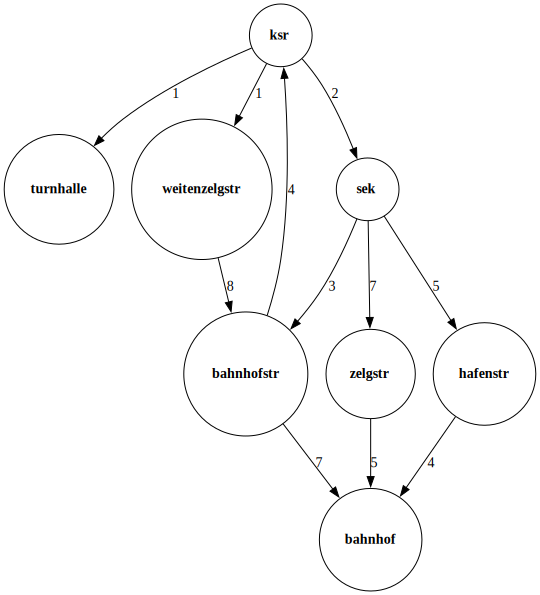

In [115]:
draw_graph(graph)

In [4]:
def traversierung(graph, start, visited):
    if start in visited:
        #print(f'Ignoring {start}')
        return
    visited.append(start)
    for neighbor in graph[start]:
        traversierung(graph, neighbor, visited)
    return visited

In [5]:
traversierung(graph, "ksr", [])

KeyError: 'ksr'

In [6]:
def bfs_traversierung(graph, start):
    queue = [start]
    visited = set([start])

    while len(queue) > 0:
        node = queue.pop(0)
        #print(f"Visiting {node}, visited={visited}")
        yield node
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

In [7]:
for node in bfs_traversierung(graph, "ksr"):
    print(node)

ksr


KeyError: 'ksr'

In [116]:
for node in dfs(graph, "ksr"): print(node)

ksr
turnhalle
weitenzelgstr
bahnhofstr
bahnhof
sek
hafenstr
zelgstr


In [75]:

print(find_path_dfs(graph, "ksr", "bahnhof"))

['ksr', 'weitenzelgstr', 'bahnhofstr', 'bahnhof']


In [40]:
def find_path(graph, start, end, visited):
    if start == end:
        return [start]
    
    if start in visited:
        return False
    visited.add(start)
    
    #print(f'trying neighbors of {start}')
    for neighbor in graph[start]:
        path = find_path(graph, neighbor, end, visited)
        if path:
            return [start] + path

    return False

find_path(graph, "ksr", "bahnhof", set())

RecursionError: maximum recursion depth exceeded

In [4]:
import fahrplan

graph = fahrplan.latest

#shortest_path(graph, "Romanshorn", "Lugano")

In [6]:
def bfs_p(graph, start):
    """ A generator of all direct parent-child connections, in breadth-first order, with every child only appearing once. """
    candidates = [start]
    visited = set()
    while candidates:
        next = candidates.pop(0)
        for neighbor in graph[next]:
            if not neighbor in visited:
                visited.add(neighbor)
                candidates.append(neighbor)
                yield next, neighbor



In [12]:

import itertools

connections = {}
start = "Romanshorn"
target = "Hinterfultigen, Post"
for parent, neighbor in bfs_p(graph, start):
    #print(' -> '.join([parent, neighbor]))
    connections[neighbor] = parent
    if neighbor == target:
        route = []
        next = neighbor
        while next != start:
            route.append(next)
            next = connections[next]
        route.append(start)
        print(list(reversed(route)))
        break



['Romanshorn', 'St. Gallen', 'Zürich HB', 'Bern', 'Belp', 'Belp, Bahnhof', 'Riggisberg, Post', 'Riggisberg, Spital', 'Riggisberg, Hasli', 'Rüeggisberg, Tromwil', 'Rüeggisberg, Mättiwil', 'Fultigen, Abzw.', 'Vorderfultigen, Abzw. Egg', 'Vorderfultigen, Käserei', 'Vorderfultigen, Kuhweid', 'Hinterfultigen, Post']


In [18]:
def build_path_from_parents(graph, parents, start, end):
    """Builds the path from start to end given a parent dictionary
       for all nodes. Also computes the total path length from 
       the graph adjacency list."""
    path = []
    node = end
    total = 0
    while node != start:
        parent = parents[node]
        edge = graph[parent][node]
        total += edge
        path.insert(0, (node, edge))
        node = parent
    path.insert(0, (start, '0'))
    result = {
        'path': path,
        'length': total
    }
    return result
 
def find_path_bfs(graph, start, end):
    """Finds a path from start to end using BFS. """
    candidates = [start]
    visited = {start: None}
    while candidates:
        next = candidates.pop(0)
        for neighbor in graph[next]:
            if neighbor not in visited:
                visited[neighbor] = next
                candidates.append(neighbor)
                if neighbor == end:
                    return build_path_from_parents(graph, visited, start, end)
    return None  # No path found

In [36]:
def bfs_linearisierung(graph, start):
    visited = set()
    candidates = [start]

    while candidates:
        node = candidates.pop(0)
        if node in visited:
            continue
        visited.add(node)
        yield node
        for neighbor in graph[node]:
            candidates.append(neighbor)

for node in bfs_linearisierung(graph, "ksr"): print(node)

ksr
turnhalle
weitenzelgstr
sek
bahnhofstr
hafenstr
zelgstr
bahnhof


In [44]:
def bfs_pfadsuche(graph, start, end):
    visited = {start: None}
    candidates = [start]

    while candidates:
        node = candidates.pop(0)
        for neighbor in graph[node]:
            if neighbor in visited:
                continue
            visited[neighbor] = node  # record parent-child relationship
            candidates.append(neighbor)

            if neighbor == end:
                # Bingo: found destination
                current = end
                path = [end]
                while current != start:
                    current = visited[current]
                    path.insert(0, current)
                return "Found a path " + str(path)




In [48]:
print(find_path_bfs(fahrplan.latest, "Romanshorn", "Hinterfultigen, Post"))

{'path': [('Romanshorn', 0), ('St. Gallen', 18), ('Zürich HB', 94), ('Bern', 56), ('Belp', 12), ('Belp, Bahnhof', 2), ('Riggisberg, Post', 17), ('Riggisberg, Spital', 2), ('Riggisberg, Hasli', 1), ('Rüeggisberg, Tromwil', 1), ('Rüeggisberg, Mättiwil', 0), ('Fultigen, Abzw.', 1), ('Vorderfultigen, Abzw. Egg', 3), ('Vorderfultigen, Käserei', 2), ('Vorderfultigen, Kuhweid', 1), ('Hinterfultigen, Post', 3)], 'length': 213}
